<a href="https://colab.research.google.com/github/Sitaoooo/B20lab_sitao/blob/main/sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This set of questions tests understanding of several sampling methods. You will compare the samples generated by your implementation with those produced by Python's sampling function.

Q1. Use inverse transform sampling to sample from a exponential distribution with lambda=1. Recall exponential distribution's CDF: $F(x;\lambda)=1 - \exp(-\lambda x)$.

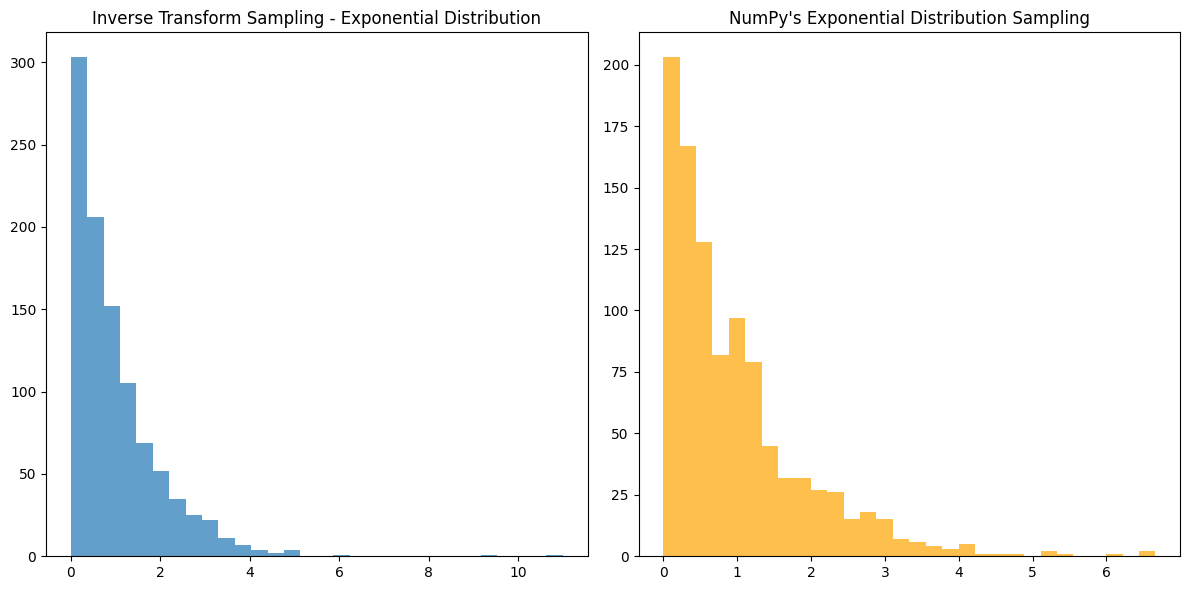

In [ ]:
# Sample code for Inverse Transform Sampling

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# TODO: Complete this function
def inverse_cdf_exp(lam, u):
    return - np.log(1-u)/lam

# Parameters
lam = 1.0  # Rate parameter for exponential distribution
n_samples = 1000

# Generate samples using inverse transform sampling
# TODO: complete the line below
uniform_samples = np.random.uniform(0, 1, n_samples)
exp_samples = inverse_cdf_exp(lam, uniform_samples)


# Plotting
plt.figure(figsize=(12, 6))

# Histogram of Inverse Transform Sampling
plt.subplot(1, 2, 1)
plt.hist(exp_samples, bins=30, alpha=0.7, label="Inverse Transform Sampling")
plt.title("Inverse Transform Sampling - Exponential Distribution")

# Generate samples using NumPy's exponential function
numpy_exp_samples = np.random.exponential(1/lam, n_samples)
# Histogram of NumPy Exponential Samples
plt.subplot(1, 2, 2)
plt.hist(numpy_exp_samples, bins=30, alpha=0.7, color='orange', label="NumPy Sampling")
plt.title("NumPy's Exponential Distribution Sampling")

plt.tight_layout()
plt.show()

Q2. Please use rejection sampling to sample from a 2D Gaussian distribution (as defined below by target_dist) and compare your sampled points with those sampled by numpy function.

Q3. The get_scale function may be improved. Please modify the get_scale function below so that the generated samples are closer to the numpy's samples.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def rejection_sampling_2d_gaussian(target_dist, proposal_range, n_samples, scale):
    samples = []

    while len(samples) < n_samples:
        # Sample from the proposal distribution (uniform)
        x = np.random.uniform(proposal_range[0][0], proposal_range[1][0])
        y = np.random.uniform(proposal_range[0][1], proposal_range[1][1])
        proposal_sample = np.array([x, y])

        # Calculate acceptance probability, TODO: complete the line below
        proposal_prob = 1/((proposal_range[1][0]-proposal_range[0][0])*(proposal_range[1][1]-proposal_range[0][1]))
        target_prob = target_dist.pdf(proposal_sample)

        # Accept or reject the sample, TODO: complete if condition below
        if np.random.uniform(0, scale*proposal_prob) < target_prob:
            samples.append(proposal_sample)

    return np.array(samples)

# TODO: try to design a better function
def get_scale(target_dist, unifb):
    return target_dist.pdf(0)*((2*unifb)**2)

# Parameters for target distribution which we want to sample
target_mean = [0, 0]
target_cov = [[1, 0.3], [0.3, 1]]
target_dist = stats.multivariate_normal(target_mean, target_cov)
n_samples = 1000

# Use 2d uniform as Proposal dist
unifb = 3
proposal_range = [[-unifb, -unifb], [unifb, unifb]]
scale = get_scale(target_dist, unifb)

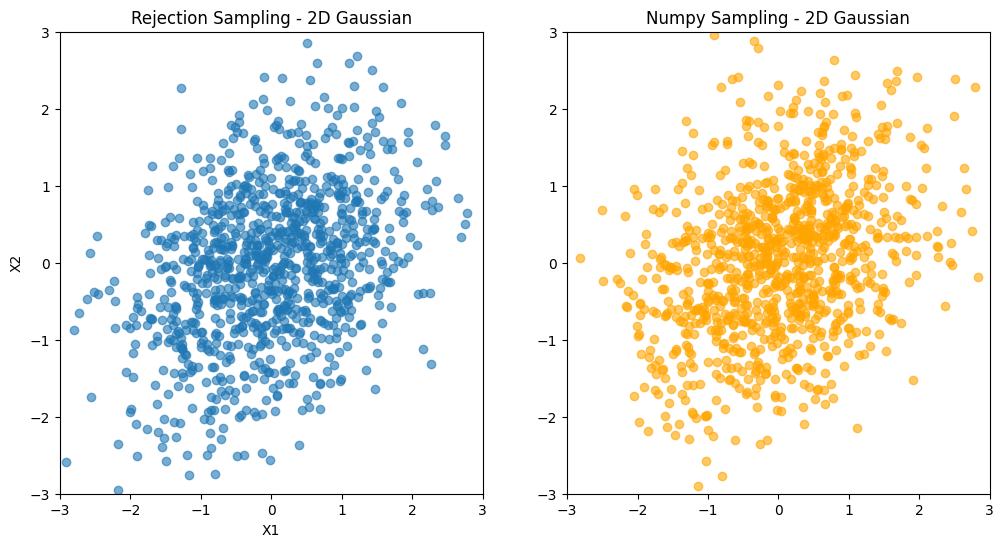

In [ ]:
# Generate samples using rejection sampling
samples_rejection = rejection_sampling_2d_gaussian(target_dist, proposal_range, n_samples, scale)

# Plotting
plt.figure(figsize=(12, 6))

# Plot Rejection Sampling
plt.subplot(1, 2, 1)
plt.scatter(samples_rejection[:, 0], samples_rejection[:, 1], alpha=0.6, label="Rejection Sampling")
plt.title("Rejection Sampling - 2D Gaussian")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim((-3,3))
plt.ylim((-3,3))

# Generate samples using numpy's function
samples_numpy = np.random.multivariate_normal(target_mean, target_cov, n_samples)
# Plot Numpy Sampling
plt.subplot(1, 2, 2)
plt.scatter(samples_numpy[:, 0], samples_numpy[:, 1], alpha=0.6, color='orange', label="Numpy samples")
plt.title("Numpy Sampling - 2D Gaussian")

plt.xlim((-3,3))
plt.ylim((-3,3))
plt.show()

Q4. Complete the code below to sample from the same 2d Gaussian distribution by metropolis algorithm. Use a 2d Gaussian distribution as proposal distribution with given std.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def metropolis_algorithm_2d_gaussian(mean, cov, n_samples, proposal_std):
    """
    Generate samples from a 2D Gaussian distribution using the Metropolis Algorithm.
    """
    # Initialize the first sample
    current_sample = np.random.multivariate_normal(mean, cov)
    samples = [current_sample]

    while len(samples) < n_samples:
        # TODO: Generate a new sample from the proposal distribution
        proposal_sample = np.random.multivariate_normal(current_sample, np.eye(2)*proposal_std**2)

        # Calculate the acceptance probability
        current_prob = stats.multivariate_normal.pdf(current_sample, mean, cov)
        # TODO: complete the line below
        proposal_prob = stats.multivariate_normal.pdf(proposal_sample, mean, cov)
        # TODO: complete the line below
        acceptance_prob = min(1,proposal_prob/current_prob)

        # Accept or reject the proposal sample, TODO: complete the if block
        if np.random.uniform(0,1)<acceptance_prob:
            current_sample = proposal_sample
            samples.append(current_sample)

    return np.array(samples)

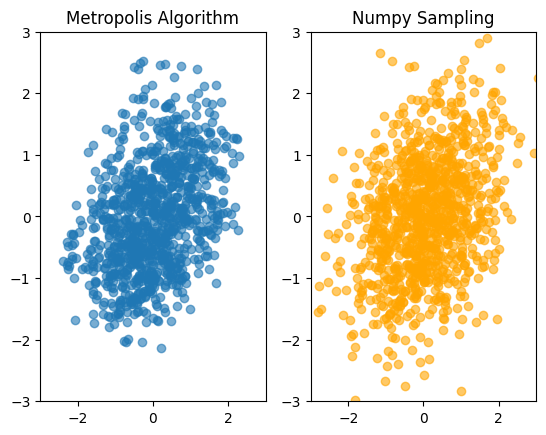

In [ ]:
# Parameters for the Metropolis Algorithm
target_mean = [0, 0]
target_cov = [[1, 0.3], [0.3, 1]]
# Number of samples to generate
n_samples = 1000

# Standard deviation for the proposal distribution (NOTE: you can assume the covariance matrix of proposal distribution is diagonal)
proposal_std = 0.5

# Generate samples using the Metropolis Algorithm
samples_metropolis = metropolis_algorithm_2d_gaussian(target_mean, target_cov, n_samples, proposal_std)

# Plotting the samples
plt.subplot(1, 2, 1)
plt.scatter(samples_metropolis[:, 0], samples_metropolis[:, 1], alpha=0.6, label="Metropolis Sampling")
plt.title("Metropolis Algorithm")
plt.xlim((-3,3))
plt.ylim((-3,3))

# Generate samples using numpy's function
samples_numpy = np.random.multivariate_normal(target_mean, target_cov, n_samples)
# Plot Numpy Sampling
plt.subplot(1, 2, 2)
plt.scatter(samples_numpy[:, 0], samples_numpy[:, 1], alpha=0.6, color='orange', label="Numpy samples")
plt.title("Numpy Sampling")
plt.xlim((-3,3))
plt.ylim((-3,3))

plt.show()